Dataset Columns: ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
Missing Values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64
Using 'type' as the target column


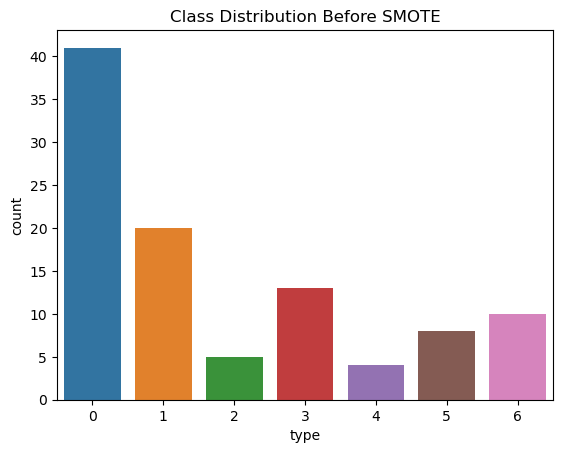

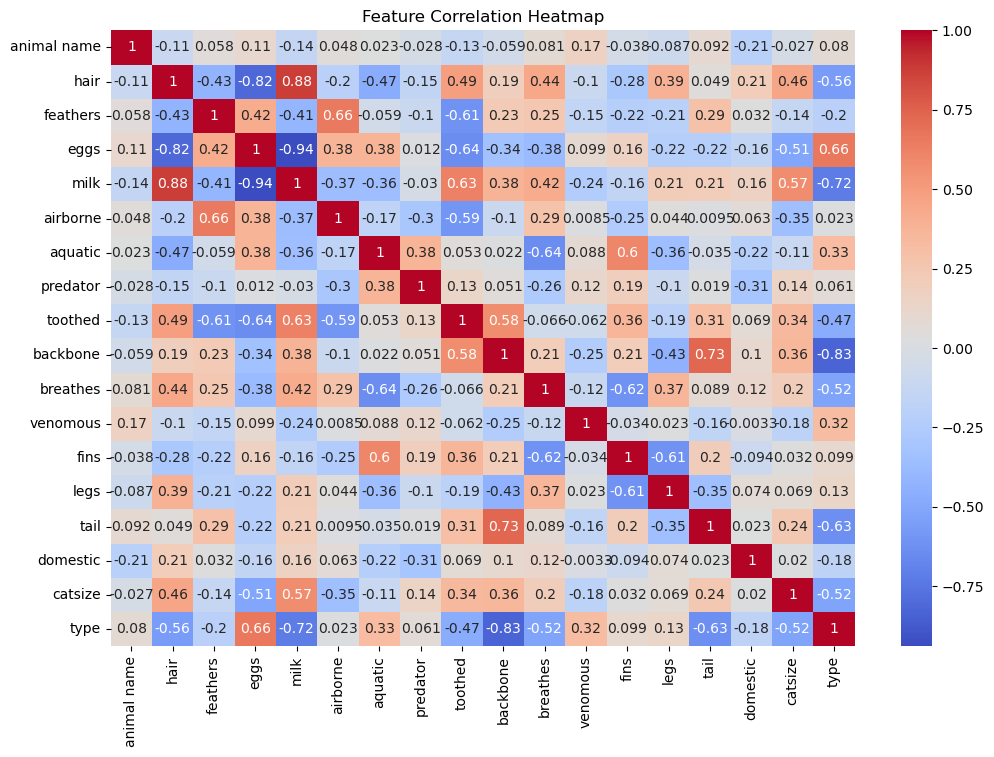

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_decision_regions

# Load dataset
file_path = r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\Zoo.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("Dataset Columns:", df.columns.tolist())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

target_column = "type"
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in the dataset!")
    
print(f"Using '{target_column}' as the target column")

# Encode categorical variables
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check class distribution (Imbalance check)
sns.countplot(x=df[target_column])
plt.title("Class Distribution Before SMOTE")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Prepare data
X = df.drop(columns=[target_column, 'animal_name'], errors='ignore')
y = df[target_column]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
sns.countplot(x=y_train)
plt.title("Class Distribution After SMOTE")
plt.show()

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier
k = 5  
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Evaluation
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

def plot_knn_decision_boundary(X, y, k):
    X_2d = X[:, :2]  # Use first two features for visualization
    knn_2d = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_2d.fit(X_2d, y)
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_2d, y.to_numpy(), clf=knn_2d, legend=2)
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_knn_decision_boundary(X_train, y_train, k)


In [7]:
pip install --upgrade scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/238.4 kB 991.0 kB/s eta 0:00:01
   ------------------ --------------------- 112.6/238.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_decision_regions

# Load dataset
data = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\Zoo.csv")

# Print column names to verify target column name
print("Dataset Columns:", data.columns)

# Check if 'target' exists; otherwise, replace it with the correct column name
target_col = 'target' if 'target' in data.columns else data.columns[-1]  # Assuming last column is target

X = data.drop(columns=[target_col])
y = data[target_col]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE for balancing (Handling small sample issue with k_neighbors=2)
smote = SMOTE(k_neighbors=2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Alternative: Use SMOTETomek if needed
# smote_tomek = SMOTETomek(random_state=42)
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

# Alternative: Use BorderlineSMOTE if needed
# borderline_smote = BorderlineSMOTE(k_neighbors=2, random_state=42)
# X_train, y_train = borderline_smote.fit_resample(X_train, y_train)

# Alternative: Use Random Undersampling for extreme imbalance
# under_sampler = RandomUnderSampler(random_state=42)
# X_train, y_train = under_sampler.fit_resample(X_train, y_train)

# Find optimal K value
f1_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plot F1-score vs K value
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('K Value')
plt.ylabel('F1-score')
plt.title('F1-score vs K Value for KNN')
plt.show()

# Train final model with optimal K
optimal_k = k_values[np.argmax(f1_scores)]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluate model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test, y_test.values, clf=knn, legend=2)
plt.title(f'KNN Decision Regions (K={optimal_k})')
plt.show()


Dataset Columns: Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


ValueError: could not convert string to float: 'clam'

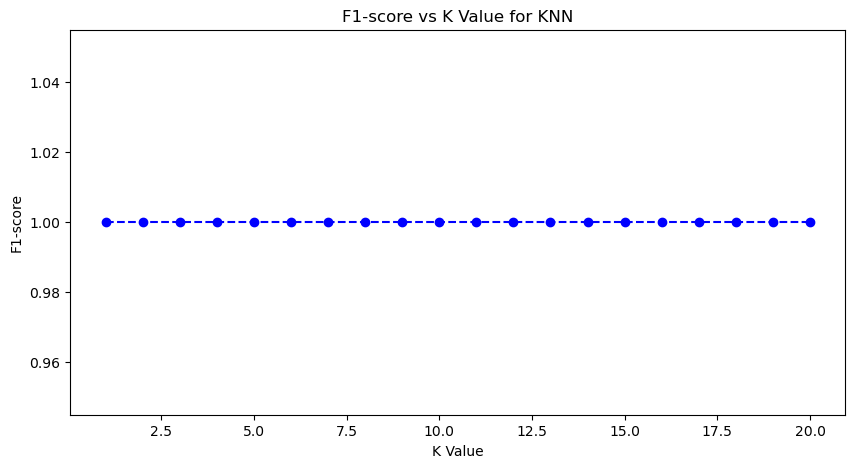

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

F1-score: 1.0


D:\anaconda\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


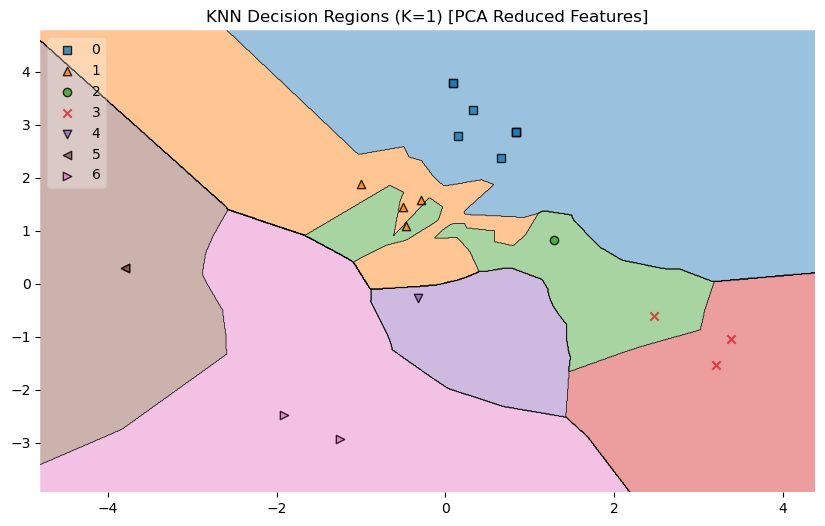

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\Zoo.csv")

# Drop non-numeric column (animal name)
data = data.drop(columns=['animal name'])

# Define features and target
X = data.drop(columns=['type'])
y = data['type']

# Encode target variable if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE for balancing (Handling small sample issue with k_neighbors=2)
smote = SMOTE(k_neighbors=2, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Find optimal K value
f1_scores = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plot F1-score vs K value
plt.figure(figsize=(10, 5))
plt.plot(k_values, f1_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('K Value')
plt.ylabel('F1-score')
plt.title('F1-score vs K Value for KNN')
plt.show()

# Train final model with optimal K
optimal_k = k_values[np.argmax(f1_scores)]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluate model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train model on reduced features
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k)
knn_pca.fit(X_train_pca, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_pca, y_test, clf=knn_pca, legend=2)
plt.title(f'KNN Decision Regions (K={optimal_k}) [PCA Reduced Features]')
plt.show()
